# Simple Imports and Data Loading

## Learning Objectives

1. Why is it important to fill NaN values and how do we do it?
2. Why is it important for us to analyze the data and ask questions before actual training and testing?
3. What can we do with categorical variables for training and testing?
4. What are ways that we can make the model training more efficient and less biased?

We will use the certain libraries of Pandas, MatPlotLib, and Seaborn as well as later imports of Numpy and Sci-Kit Learn.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 6]

In [3]:
import matplotlib
%matplotlib inline

In [4]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

# Data Analysis

Data can contain some missing values that interfere with smooth training. Most examples include NaN or null values and obviously, we cannot train with such values.

In [5]:
print(f"The number of unique cabins are {len(train['Cabin'].unique())}")

The number of unique cabins are 148


In [6]:
cat_columns = ["Pclass", "Sex", "Embarked"]

In [7]:
real_value = ["Age", "SibSp", "Fare", "Parch"]

In [8]:
def isColumnNan(columnName: str) -> bool:
    return pd.isna(train[columnName]).any()

In [9]:
columns = train.keys()

nanColumns = list()

for col in columns:
    isColumnNanVar = isColumnNan(col)
    print(f"The column {col} has nan values = {isColumnNanVar}")
    if isColumnNanVar:
        nanColumns.append(col)

The column PassengerId has nan values = False
The column Survived has nan values = False
The column Pclass has nan values = False
The column Name has nan values = False
The column Sex has nan values = False
The column Age has nan values = True
The column SibSp has nan values = False
The column Parch has nan values = False
The column Ticket has nan values = False
The column Fare has nan values = False
The column Cabin has nan values = True
The column Embarked has nan values = True


# Questions and Hypotheses

1. Is there a correlation between age and survival rate? What single features might be correlated to survival rate? 
**Hypothesis:** Older people are more likely to survive. 

**Answer:** Looking at the below graph we cant really tell if older or younger people are more likely to survive.

1. Do older people have more parents traveling with them? 
**Hypothesis:** No, older people won't have parents with them. 

**Answer:** We find out that older people do not have parents with them so our hypothesis was correct.

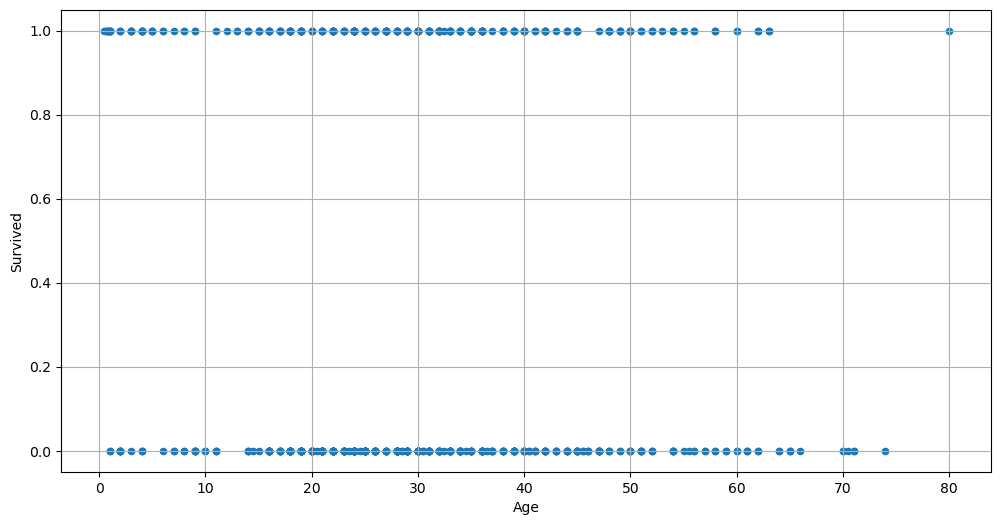

<Figure size 4000x1000 with 0 Axes>

In [10]:
train[["Age", "Survived"]].plot.scatter(y="Survived", x="Age", grid=True)
plt.figure(figsize=(40, 10))

plt.show()

In [11]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
# help(sns.scatterplot)
print("")

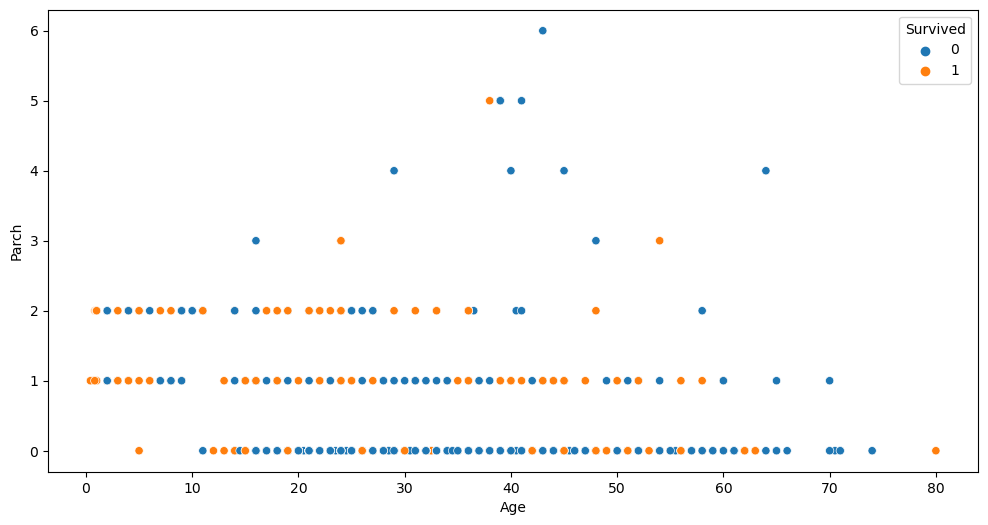

In [13]:
g = sns.scatterplot(x="Age", y="Parch", hue="Survived",data=train[["Age", "Parch", "Survived"]], legend=True)

# plt.legend(title='Survival Status', loc='upper right', labels=['Survived', 'Not Survived'])

# Feature Preprocessing


1. Handle NaN or null values
2. OneHotEncode categorical variables 

### Missing values handling

**The impute function** is a generic function that allows us to fix NaN values in either categorical variables and numerical variables. We replace the missing values with the mean of the variable for numerical variables and the mode for the categorial variables.

In [14]:
# ANSWER

def impute(column_name) -> None:
    if column_name in real_value:
        mean = train[column_name].mean()
        train.loc[pd.isna(train[column_name]), column_name] = mean
    elif column_name in cat_columns:
        mode = train[column_name].mode()
        train.loc[pd.isna(train[column_name]), column_name] = mode[0]
    else:
        print("Value is not in list.")

We can identify certain columns of type categorical or numerical based on our data analysis of every column in the dataset. Through this we can define a function that takes parameters of the specific column and the dataframe (in this case, 'train') and then judge what we should replace the missing values with if any. If not present, we simply output an indication that it is not present. 

In [15]:
impute('Age')
impute('Embarked')

### One hot encoding

**OneHotEncoder** is a class from Sci-Kit Learn that allows for categorical features to be parsed in such a way that it can be used for computation. With regular categorical values (letters, names), it would be very tedious to train the model and get it to involve such non-numerical values. However, **OneHotEncoder** allows for much easier translation and prediction. 

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
oneHotModel = OneHotEncoder()

### Sparse matrices

**Sparse matrices** are matrices that not only store the values but also the location of the values that make it much easier for model training. This should be not to worried to build on one's own but is important to understand for later usage of the specific type of matrices.

In [18]:
import numpy as np
from scipy import sparse # Sparse Import

In [19]:
X = np.array(([0, 34, 0], [36, 0, 0], [0, 0, 0]))

In [20]:
sparse_X = sparse.csr_matrix(X)

In [21]:
print(sparse_X)

  (0, 1)	34
  (1, 0)	36


In [22]:
oneHotArray = oneHotModel.fit_transform(train[cat_columns]).toarray()

Embarked: C = Cherbourg, Q = Queenstown, S = Southampton

We show and understand that OneHotEncoding does work on categorical variables and that it is present in our dataset.

In [23]:
cat_columns

['Pclass', 'Sex', 'Embarked']

In [24]:
oneHotModel.categories_

[array([1, 2, 3]),
 array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [25]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
83,84,0,1,"Carrau, Mr. Francisco M",male,28.000000,0,0,113059,47.1000,NaN,S
582,583,0,2,"Downton, Mr. William James",male,54.000000,0,0,28403,26.0000,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,29.699118,0,0,2664,7.2250,NaN,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
512,513,1,1,"McGough, Mr. James Robert",male,36.000000,0,0,PC 17473,26.2875,E25,S


In [26]:
oneHotArray[198]
oneHotArray[707]
oneHotArray[199]
oneHotArray[683]
oneHotArray[835]

array([1., 0., 0., 1., 0., 1., 0., 0.])

The above shows our one hot works. 

In [27]:
oneHotArray

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

The axis in np.concatenate represents the axis in which the values are being added. **axis=0** or default represents the axis being added from the respective to the rows. **axis=1** or default represents the axis being added from the respective to the columns

In [28]:
oneHotArray.shape

(891, 8)

In [29]:
realValueArray = np.array(train[real_value])

In [30]:
realValueArray.shape

(891, 4)

In [31]:
X

array([[ 0, 34,  0],
       [36,  0,  0],
       [ 0,  0,  0]])

In [32]:
X_data = np.concatenate((realValueArray, oneHotArray), axis = 1)

In [33]:
X_data[:, 4:]

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [34]:
Y_data = np.array(train["Survived"])

In [35]:
X_data.shape, Y_data.shape

((891, 12), (891,))

## Machine learning model 

1. Shuffle the data 
1. Create cross validation sets 
1. Train logistic regression classifier
    1. Analysis of logistic regression
1. Train decision tree classifier
1. Train random forest classifier

### Shuffling Data and Concatenation

In [36]:
Y_data = Y_data.reshape(891, 1)

In [37]:
X = np.concatenate((X_data, Y_data), axis = 1)

We can simply concatenate a column which is the row count of the training dataset and just 1 for the column obviously. Then we just use **np.concatenate** to add the column to the front of the dataset. This allows us to add an index column to the dataset and make it easier for the model to train and for us to access certain data.

In [38]:
train_index = np.array(train.index).reshape(891, 1)
X_with_index = np.concatenate((train_index, X), axis=1)

X_with_index
X[199, :], X_with_index[199, :]

(array([24.,  0., 13.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.]),
 array([199.,  24.,   0.,  13.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.]))

In [39]:
np.random.shuffle(X)

In [40]:
X.shape

(891, 13)

### K-Cross Fold Validation and Metrics

In [41]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [42]:
kFoldModel = KFold(n_splits=3)

**F1-score** is simply the calculation listed below. Parameters it needs is just precision and recall.

**Precision** is the amount of relate accuracy of the true positives as well as the significance of it. The formula is just **(true-positives)/(true-positives + false_positives)**. We can simply calculate this by comparing the ground truth and predictions to find the needed values.

**Recall** is the measure of the ability of the model to predict true positives. The formula is just **(true-positives)/(true-positives + false-negatives)**. Again, we can simply calculate this by comparing the ground truth and predictions to find the needed values. 

In [43]:
def f1_score(precision, recall):
    return (precision * recall) / (precision + recall)

In [44]:
def precision(ground_truth, predictions) -> float:
    
    true_positives = 0
    false_positives = 0
    for i in enumerate(ground_truth):
        if ground_truth[i[0]] == predictions[i[0]] and ground_truth[i[0]] == 1:
            true_positives += 1;
        elif ground_truth[i[0]] != predictions[i[0]] and ground_truth[i[0]] == 0:
            false_positives += 1;
        
    
    return (true_positives) / (true_positives + false_positives)

In [45]:
def recall(ground_truth, predictions) -> float:
    
    false_negatives = 0
    true_positives = 0
    for i in enumerate(ground_truth):
        if ground_truth[i[0]] == predictions[i[0]] and ground_truth[i[0]] == 1:
            true_positives += 1;
        elif ground_truth[i[0]] != predictions[i[0]] and ground_truth[i[0]] == 1:
            false_negatives += 1;
        
    
    return (true_positives) / (true_positives + false_negatives)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


for i, indices in enumerate(kFoldModel.split(X)):
    print(f"Training cross validation iteration {i + 1}")
    logitModel = LogisticRegression()
    trainIndices = indices[0]
    testIndices = indices[1]
    
    train_val_data_x = X[trainIndices, :12]
    train_val_data_y = X[trainIndices, 12]
    
    test_val_data_x = X[testIndices, :12]
    test_val_data_y = X[testIndices, 12]
    
    logitModel.fit(train_val_data_x, train_val_data_y)
    
    predictions = logitModel.predict(test_val_data_x)
    
    p_score = precision_score(test_val_data_y, predictions)
    
    print(f"The precision of LR is = {p_score}")
    

Training cross validation iteration 1
The precision of LR is = 0.7719298245614035
Training cross validation iteration 2
The precision of LR is = 0.7653061224489796
Training cross validation iteration 3
The precision of LR is = 0.7604166666666666


/Users/akhilkrishnamurthy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/akhilkrishnamurthy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

This is the part that takes the longest to compute. In this case, we will try to find the optimal hyperparameter for the **n_estimators** parameters for the RandomForestClassifier. We can simply do this by training the model over many different **n_estimator** values and finding the optimal prediction for it.

Intuitively, finding the optimal values for the hyperparameters involves doing a complete search over the values. However, with such large values of the dataset and the hyperparameter testing values, we can use a predefined idea of a **GridSearch**. GridSearch involves us finding the ideal hyperparameter values with O(n^3) time complexity (all in all) but only a constant list of hyperparameters for us to search. In this case, our hyperparameters are **n_estimators** and **max_depth**. Therefore, we create two lists for each respective hyperparameters such that we can check over each one and compare the performance.

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

max_p_score = 0
score_at_r = 0
best_estimator = 0
best_depth = 0

# grid search on the following
number_estimators = [5, 10, 100, 200, 300, 400]
maximum_depth = [3, 6, 9, 12]

for k in number_estimators:
    for j in maximum_depth:
        
        p_scores = []
        r_scores = []

        for i, indices in enumerate(kFoldModel.split(X)):
            logitModel = RandomForestClassifier(n_estimators = k, max_depth= j)
            trainIndices = indices[0]
            testIndices = indices[1]

            train_val_data_x = X[trainIndices, :12]
            train_val_data_y = X[trainIndices, 12]

            test_val_data_x = X[testIndices, :12]
            test_val_data_y = X[testIndices, 12]

            logitModel.fit(train_val_data_x, train_val_data_y)

            predictions = logitModel.predict(test_val_data_x)

            p_scores.append(precision(test_val_data_y, predictions))
            r_scores.append(recall(test_val_data_y, predictions))


        av_p_score = sum(p_scores) / 3;
        av_r_score = sum(r_scores) / 3;
        
        print(f"Current estimator: {k}")
        print(f"Current maximum depth: {j}")
        print(f"Average precision score: {av_p_score}")
        print(f"Average recall score: {av_r_score}")
        print("-----------------------------")
        
        if av_p_score > max_p_score:
            max_p_score = av_p_score;
            score_at_r = av_r_score;
            best_estimator = k;   
            best_depth = j


print(f"Maximum Precision: {max_p_score}")
print(f"Minimum Recall: {score_at_r}")
print(f"Best Estimator: {best_estimator}")
print(f"Best Depth: {best_depth}")

Current estimator: 5
Current maximum depth: 3
Average precision score: 0.8580416164957226
Average recall score: 0.5646529396529396
-----------------------------
Current estimator: 5
Current maximum depth: 6
Average precision score: 0.8005038390760836
Average recall score: 0.6506586847495938
-----------------------------
Current estimator: 5
Current maximum depth: 9
Average precision score: 0.7933366645627323
Average recall score: 0.7106555061100516
-----------------------------
Current estimator: 5
Current maximum depth: 12
Average precision score: 0.745084545084545
Average recall score: 0.6986208236208236
-----------------------------
Current estimator: 10
Current maximum depth: 3
Average precision score: 0.8558999123825825
Average recall score: 0.6067287090014363
-----------------------------
Current estimator: 10
Current maximum depth: 6
Average precision score: 0.842330623306233
Average recall score: 0.6551941324668599
-----------------------------
Current estimator: 10
Current max

We can use the hyperparameter training to find the best estimator and depth and then use those values for further training such as the cell below.

In [48]:
for i, indices in enumerate(kFoldModel.split(X)):
        print(f"Training cross validation iteration {i + 1}")
        logitModel = RandomForestClassifier(n_estimators=best_estimator, max_depth=best_depth)
        trainIndices = indices[0]
        testIndices = indices[1]

        train_val_data_x = X[trainIndices, :12]
        train_val_data_y = X[trainIndices, 12]

        test_val_data_x = X[testIndices, :12]
        test_val_data_y = X[testIndices, 12]

        logitModel.fit(train_val_data_x, train_val_data_y)

        predictions = logitModel.predict(test_val_data_x)

        p_score = precision_score(test_val_data_y, predictions)
        r_score = recall_score(test_val_data_y, predictions)
        
        
print(p_score)
print(r_score)

Training cross validation iteration 1
Training cross validation iteration 2
Training cross validation iteration 3
0.7452830188679245
0.6752136752136753


In [49]:
X[indices[0], :12].shape, X[indices[0], 12].shape

((594, 12), (594,))

In [50]:
X[indices[1], :12].shape, X[indices[1], 12].shape

((297, 12), (297,))

**K-Fold Validation Method:** This is a custom function for the K-Cross Fold Validation class wrapped into one function. This simply takes in the amount of **n_splits** (default = 3) so that it can decide how many subsets of the dataset the compiler needs to make. Then it returns such values over a period of all permutations and returns respective lists containing the subsets of the training and testing data. 

In [51]:
def mergeIndices(inputList: list()):
    outList = list()
    for i in inputList:
        outList.extend(list(range(i[0], i[1])))
    return outList

This is one way of implementing the **KCrossFold Validation**. This method takes O(n^2) time complexity and produces the same indices as the true sklearn -> KCrossFold Validation method would produce. However, as later seen, we can produce the same values through a O(n) time complexity, making it faster and more efficient for the model. 

In [52]:
def kFoldSplit(data: [], n_splits: int) -> [([], [])]:
    n = len(data)
    nPerFold = n // n_splits
    # the following sets the cut points
    splits = list(range(0, n, nPerFold))
    # The start and end of each block
    foldSlices = [(splits[k], splits[k + 1]) for k in range(len(splits) - 1)]
    print(foldSlices)
    
    outList = list()
    for i in foldSlices:
        trainList = list()
        testList = list()
        for j in foldSlices: # [(0, 20), (20, 40), (40, 60)]
            if i != j:
                trainList.append(j)
            else:
                testList.append(j)
        outList.append((mergeIndices(trainList), mergeIndices(testList)))
    return outList

This is the way of making it such that O(n) time complexity and produces the same indices that sklearn would produce. One question is if we can make a implementation of **KCrossFoldValidation** with a *sliding window algorithm*. While sliding window does also have an O(n) time complexity, it would be another way of make it more efficient. 

In [53]:
def kFoldSplit_2(data: [], n_splits: int) -> [([], [])]: # sliding window algorithm
    """
    write docs
    Args:
        data: 
        n_splits:
    Returns:
        
    """
    n = len(data)
    nPerFold = n // n_splits
    
    startIndex = 0
    endIndex = nPerFold
    
    cvFolds = list()
    for i in range(n_splits):
        if i == 0:
            cvFolds.append((list(range(endIndex, n)), list(range(startIndex, endIndex))))
        elif i == n_splits - 1:
            cvFolds.append((range(0, startIndex), range(startIndex, n)))
        else:
            cvFolds.append(([list(range(0, startIndex)) + list(range(endIndex, n))], list(range(startIndex, endIndex))))
        
        startIndex += nPerFold
        endIndex += nPerFold
    return cvFolds


As shown, this tests the optimized **KCrossFoldValidation** method through a generic list. As shown the values produced are the same as produced by the sklearn method. 

In [54]:
kFoldSplit_2(list(range(10)), 5)

[([2, 3, 4, 5, 6, 7, 8, 9], [0, 1]),
 ([[0, 1, 4, 5, 6, 7, 8, 9]], [2, 3]),
 ([[0, 1, 2, 3, 6, 7, 8, 9]], [4, 5]),
 ([[0, 1, 2, 3, 4, 5, 8, 9]], [6, 7]),
 (range(0, 8), range(8, 10))]

In [55]:
values = kFoldModel.split(list(range(101)))

for i, value in values:
    print(value)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
[34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
[ 68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100]


As shown above, the values that are produced are the same for both versions of the **KCrossFold Validation** methods - one from sklearn and one that was generated by the us.

# Conclusion

In this notebook, we have demonstrated efficiency with different parts of the model training. More specifically, we investigated: 

    - NaN values and how they affect the model training, leading to the realization of why we need to **impute** 
      them.
    
    - Data analysis and why it is important to visualize the data before we go into any other preparation or 
      training.
    
    - Different types of matrices and data that can be produced by the model and given by other libraries for us to 
      use in model training. 
      
    - How we can mutate the data to add more columns or rows and how we would do such with different libraries 
      such as NumPy or Pandas. 
      
    - Different models for use and the structure behind them. (LogisticRegression, DecisionTrees, etc.)
    
    - What are different performance measures and how we can use them to test the predictions of our model. 
    
    - How we can make the model less biased and more prepared for different situations through **KCrossFold** 
      validation methods. 
      
    - How we can create our own performance indicators and validation methods from scratch through Python, NumPy, 
      and other library features. 
      
In the end, there is much more to investigate on how to improve the model and better ways to visualize data. However, I think that there was much success as defined by our investigations and we have progressed much more on how we can train models and prepare data for it. 